In [1]:
import numpy as np
import pandas as pd
import os, cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf

# Schimbă path-urile pentru imaginile și măștile tale
root = r'D:\dataset\archive'
input_data = os.path.join(root, 'train_images')
target_data = os.path.join(root, 'train_masks')

exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

# Încărcarea imaginilor de antrenare
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

# Încărcarea măștilor de antrenare
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-32:], "|", target_path[-31:], '|', np.unique(cv2.imread(target_path)))


Number of samples: 5088 5088
train_images\00087a6bd4dc_01.jpg | train_masks\00087a6bd4dc_01.png | [0 1]
train_images\00087a6bd4dc_02.jpg | train_masks\00087a6bd4dc_02.png | [0 1]
train_images\00087a6bd4dc_03.jpg | train_masks\00087a6bd4dc_03.png | [0 1]
train_images\00087a6bd4dc_04.jpg | train_masks\00087a6bd4dc_04.png | [0 1]
train_images\00087a6bd4dc_05.jpg | train_masks\00087a6bd4dc_05.png | [0 1]
train_images\00087a6bd4dc_06.jpg | train_masks\00087a6bd4dc_06.png | [0 1]
train_images\00087a6bd4dc_07.jpg | train_masks\00087a6bd4dc_07.png | [0 1]
train_images\00087a6bd4dc_08.jpg | train_masks\00087a6bd4dc_08.png | [0 1]
train_images\00087a6bd4dc_09.jpg | train_masks\00087a6bd4dc_09.png | [0 1]
train_images\00087a6bd4dc_10.jpg | train_masks\00087a6bd4dc_10.png | [0 1]


In [2]:
input_data = os.path.join(root, 'train_images')
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


target_data = os.path.join(root, 'train_masks')
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-32:], "|", target_path[-31:], '|', np.unique(cv2.imread(target_path)))


Number of samples: 5088 5088
train_images\00087a6bd4dc_01.jpg | train_masks\00087a6bd4dc_01.png | [0 1]
train_images\00087a6bd4dc_02.jpg | train_masks\00087a6bd4dc_02.png | [0 1]
train_images\00087a6bd4dc_03.jpg | train_masks\00087a6bd4dc_03.png | [0 1]
train_images\00087a6bd4dc_04.jpg | train_masks\00087a6bd4dc_04.png | [0 1]
train_images\00087a6bd4dc_05.jpg | train_masks\00087a6bd4dc_05.png | [0 1]
train_images\00087a6bd4dc_06.jpg | train_masks\00087a6bd4dc_06.png | [0 1]
train_images\00087a6bd4dc_07.jpg | train_masks\00087a6bd4dc_07.png | [0 1]
train_images\00087a6bd4dc_08.jpg | train_masks\00087a6bd4dc_08.png | [0 1]
train_images\00087a6bd4dc_09.jpg | train_masks\00087a6bd4dc_09.png | [0 1]
train_images\00087a6bd4dc_10.jpg | train_masks\00087a6bd4dc_10.png | [0 1]


In [3]:
def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
        
    return image

def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask  = read_image(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list, split='train'):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.shuffle(8*BATCH_SIZE) if split == 'train' else dataset 
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

IMAGE_SIZE = 128
BATCH_SIZE = 86

train_dataset = data_generator(images, masks)
print("Train Dataset:", train_dataset)

Train Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(86, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(86, 128, 128, 1), dtype=tf.int32, name=None))>


In [4]:
import matplotlib.pyplot as plt 

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

(86, 128, 128, 3) (86, 128, 128, 1)
0 1


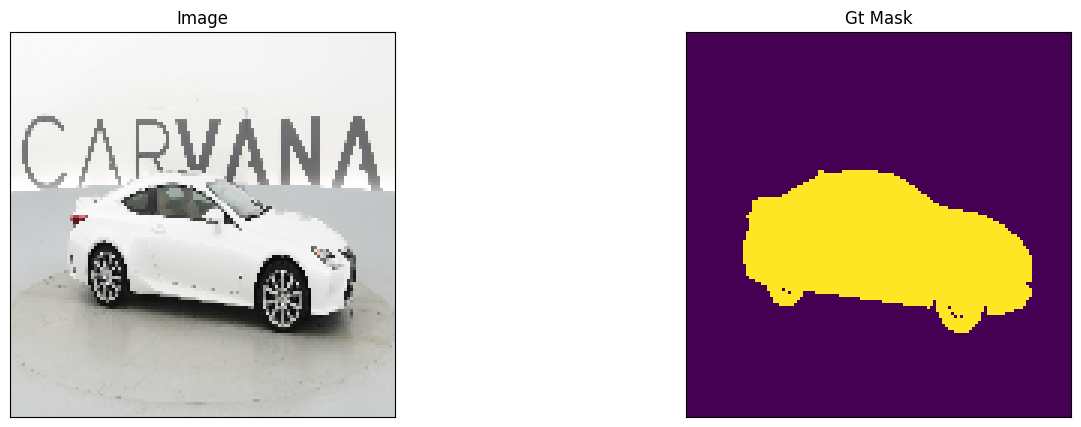

0 1


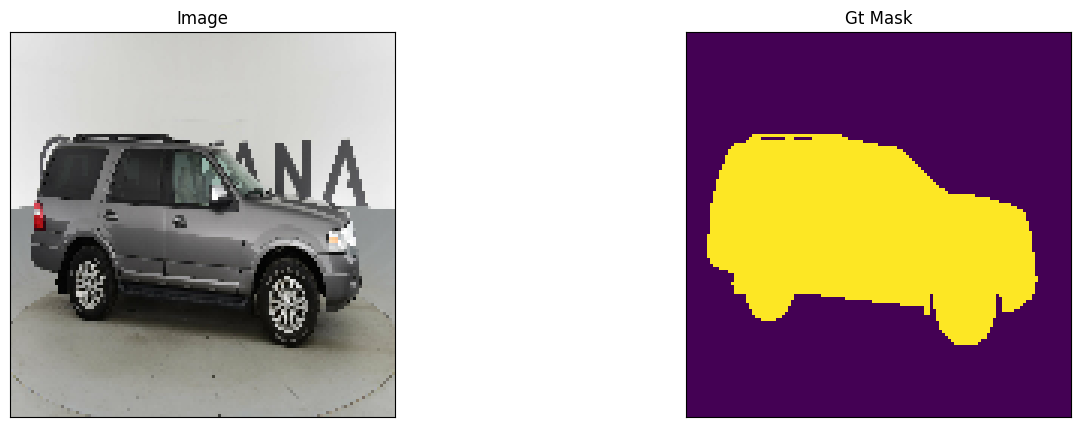

0 1


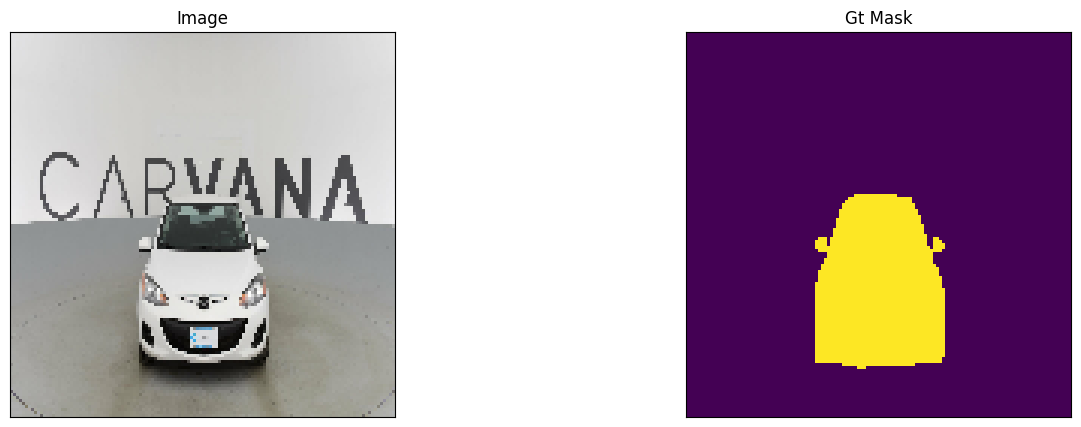

0 1


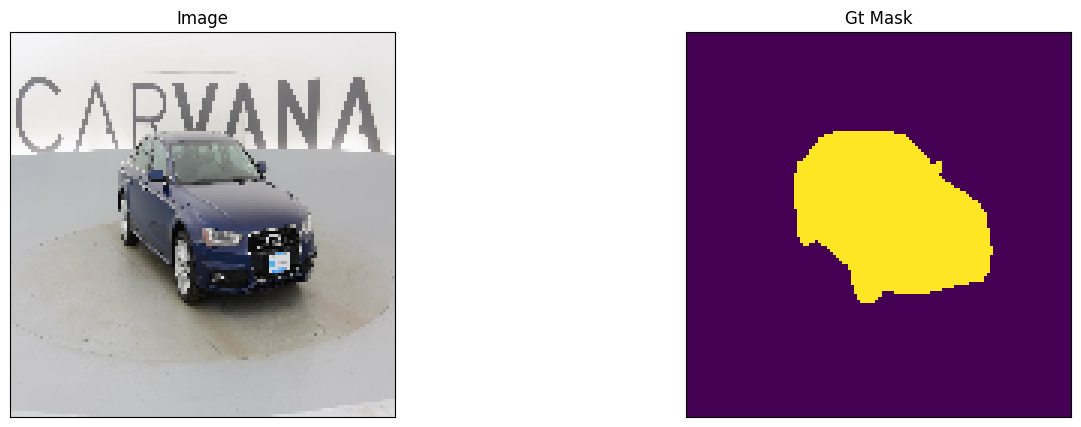

0 1


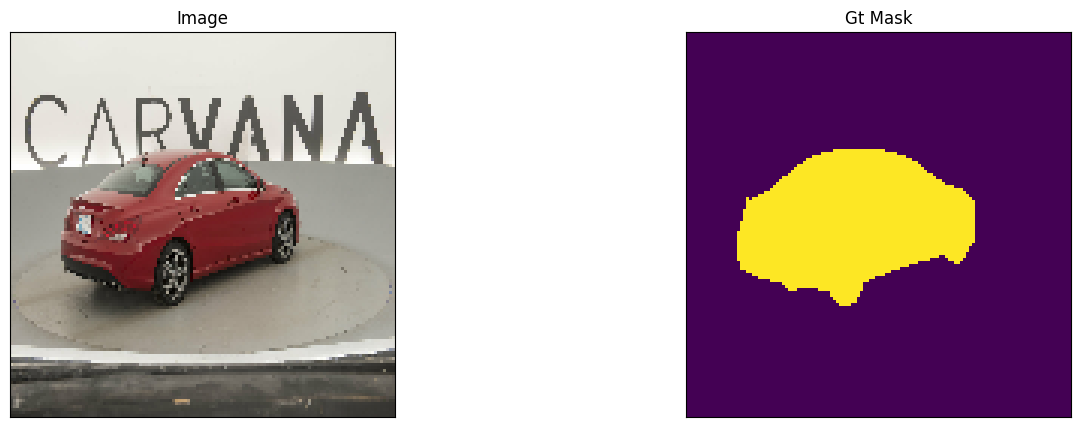

In [5]:
image, mask = next(iter(train_dataset.take(1))) # train_dataset
print(image.shape, mask.shape)

for (img, msk) in zip(image[:5], mask[:5]):
    print(mask.numpy().min(), mask.numpy().max())
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(), 
    )

In [6]:
from tensorflow import keras 
from tensorflow.keras import layers

# https://keras.io/examples/vision/oxford_pets_image_segmentation/
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="sigmoid", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size=(IMAGE_SIZE, IMAGE_SIZE), num_classes=1)
keras.utils.plot_model(model, show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [7]:
# define optomizer
optim = keras.optimizers.Adam(0.001)
bce   = keras.losses.BinaryCrossentropy()
metrics = ["accuracy"]

# compile keras model with defined optimozer, loss and metrics
model.compile(optimizer=optim, loss=bce, metrics=metrics)


In [8]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [9]:
epochs = 5
model.fit(
    train_dataset, 
    epochs=epochs, 
    callbacks=[DisplayCallback(train_dataset)]
)


Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.9175 - loss: 0.4356
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9770 - loss: 0.0539
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9807 - loss: 0.0454
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9840 - loss: 0.0379
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9849 - loss: 0.0356
